In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Applied Data Science/tech_layoffs.csv')

In [ ]:
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [ ]:
copy_df = df.copy()

In [ ]:
copy_df['total_layoffs'] = copy_df['total_layoffs'].str.replace('\D', '0', regex=True).astype(int)
copy_df['impacted_workforce_percentage'] = copy_df['impacted_workforce_percentage'].str.replace('\D', '0', regex=True).astype(int)

In [ ]:
copy_df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,0,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,0,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,0,0,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,0,0,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,0,0,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

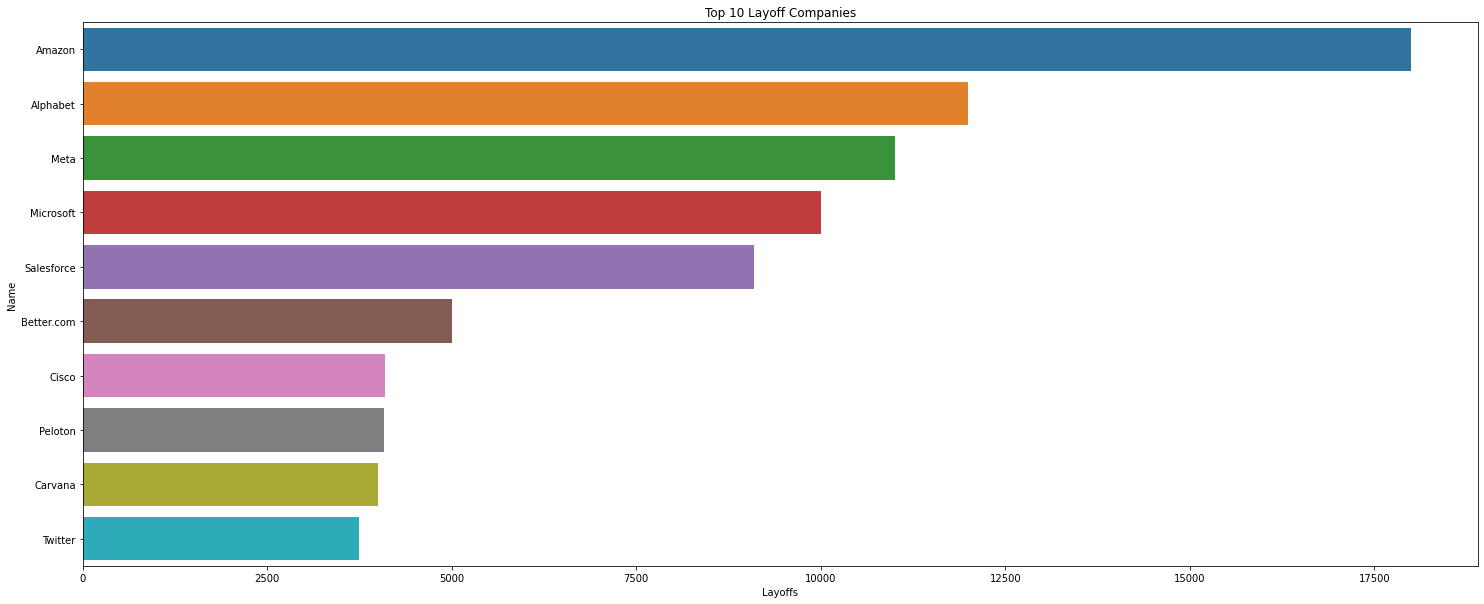

In [ ]:
top_10 = copy_df.sort_values('total_layoffs',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="total_layoffs", y="company", data=top_10,
              ax=ax)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Layoffs')
plt.ylabel('Name')
plt.show()

In [ ]:
company_layoffs = copy_df.groupby("company")["total_layoffs"].sum().sort_values(ascending=False).head(5)

company_layoffs

company
Amazon        18000
Alphabet      12000
Meta          11000
Microsoft     10000
Salesforce     9090
Name: total_layoffs, dtype: int64

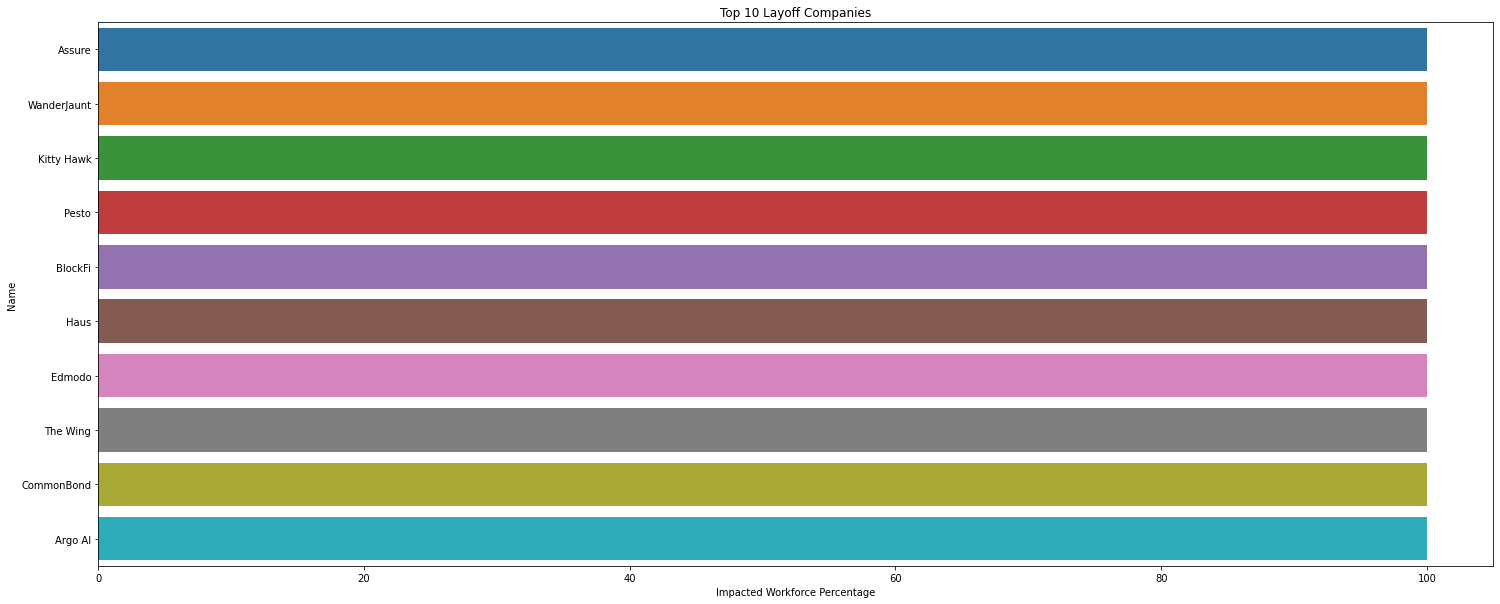

In [ ]:
top_10 = copy_df.sort_values('impacted_workforce_percentage',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="impacted_workforce_percentage", y="company", data=top_10,
              ax=ax)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Impacted Workforce Percentage')
plt.ylabel('Name')
plt.show()

In [ ]:
cut_100 = copy_df.copy()
cut_100.loc[cut_100['impacted_workforce_percentage'] != 100]
cut_100 = cut_100[cut_100.impacted_workforce_percentage != 100]
top_10 = cut_100.sort_values('impacted_workforce_percentage',ascending=False).head(10)
top_10

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
233,Uniphore,76,76,1/3/2023,"Artificial intelligence, machine learning","Palo Alto, CA",Outlook Start-Up,Private,NaN
231,Parler,60,75,1/10/2023,Social media,"Nashville, TN",The Verge,Private,NaN
232,Mojo Vision,0,75,1/6/2023,"AR, health care","Saratoga, CA",TechCrunch,Private,NaN
464,Starry,0,74,1/18/2023,"WiFi, hardware",Boston,SEC filings,Public,NaN
463,Twitter,3740,70,1/5/2023,Social Media,San Francisco,The Information,Public,NaN
230,Bizzabo,220,60,12/1/2022,Virtual Event,New York,Calcalistech,Private,NaN
462,Volta Charging,0,54,10/21/2022,"Automotive, electric vehicles",San Francisco,Volta,Public,NaN
224,Better.com,5000,50,4/19/2022,Fintech,New York,TechCrunch,Private,NaN
225,Virgin Hyperloop,111,50,2/22/2022,Transporation,Los Angeles,Fortune,Private,NaN
226,Notarize,170,50,10/31/2022,Legal Tech,Boston,Boston Business Journal,Private,NaN


In [ ]:
copy_df['total_layoffs'].sum()

138156

In [ ]:
print(df['industry'].value_counts())

Fintech                       24
Health Care                   17
PropTech                      15
E-commerce                    13
Cybersecurity                 10
                              ..
Enterprise Communication       1
AI                             1
Transporation, Logistics       1
Business development           1
enterprise tech, analytics     1
Name: industry, Length: 289, dtype: int64


In [ ]:
print('Distribution of reported dates:')
print(df['reported_date'].value_counts())



Distribution of reported dates:
1/11/2023    12
1/5/2023     11
1/10/2023    11
1/18/2023     9
12/6/2022     9
             ..
5/5/2022      1
7/3/2022      1
3/3/2022      1
6/15/2022     1
8/19/2022     1
Name: reported_date, Length: 187, dtype: int64


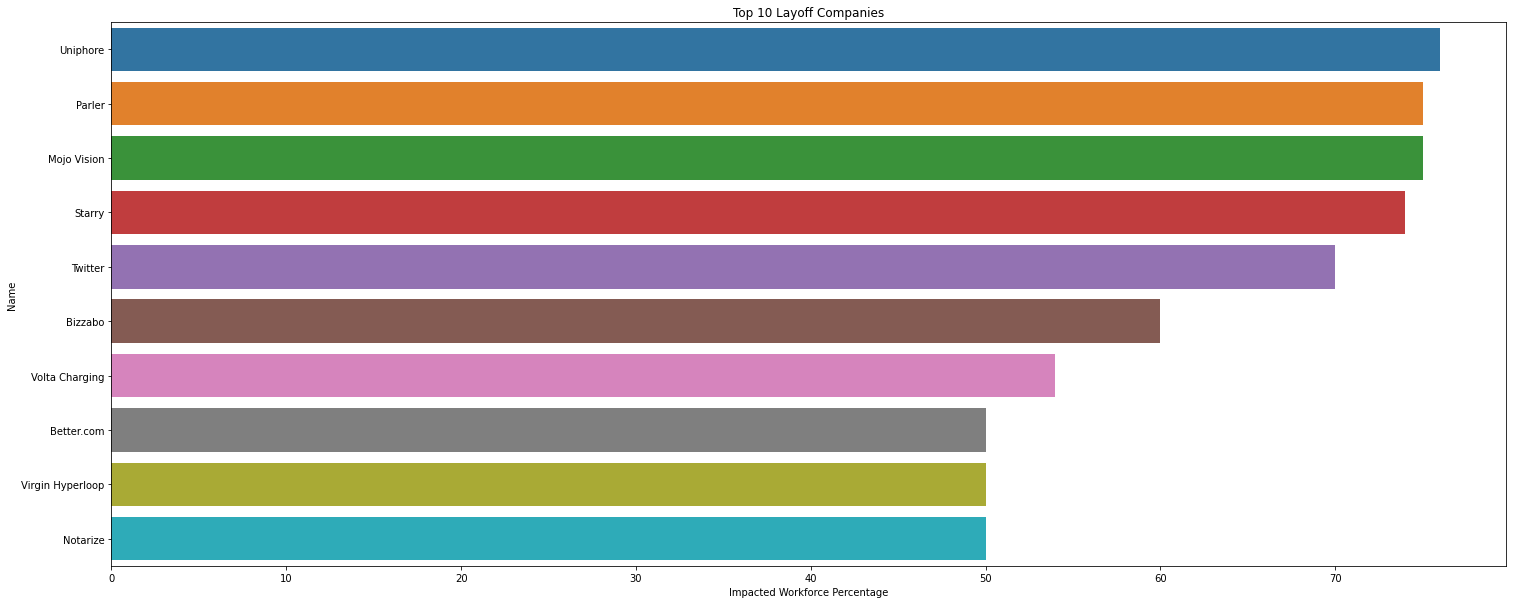

In [ ]:
top_10 = cut_100.sort_values('impacted_workforce_percentage',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="impacted_workforce_percentage", y="company", data=top_10,
              ax=ax)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Impacted Workforce Percentage')
plt.ylabel('Name')
plt.show()

In [ ]:
df.groupby('headquarter_location')['total_layoffs'].count().sort_values(ascending=False).head(5)

headquarter_location
San Francisco    136
New York          77
Seattle           21
Los Angeles       20
Boston            16
Name: total_layoffs, dtype: int64

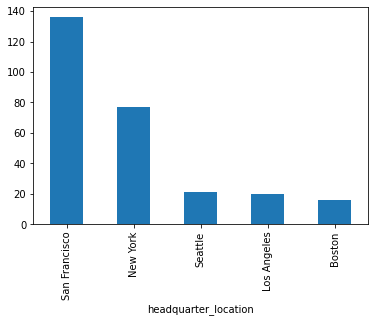

In [ ]:
df.groupby('headquarter_location')['total_layoffs'].count().sort_values(ascending=False).head(5).plot(kind="bar")

In [ ]:
industry_copy = df.copy()

ind = []
for i in industry_copy['industry'].to_list():
    ind.append(i.split(' ')[-1])

ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]

industry_copy['industry'] = ind

industry_copy

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,payments,"Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,analytics,Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,analytics,"Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,analytics,San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,software,Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,gaming,San Francisco,Seeking Alpha,Public,NaN


In [ ]:
industry_counter = industry_copy.groupby("industry")["total_layoffs"].count().sort_values(ascending=False)

industry_counter

industry
fintech       35
software      32
proptech      30
ecommerce     29
care          27
              ..
events         1
esignature     1
energy         1
editing        1
work           1
Name: total_layoffs, Length: 129, dtype: int64

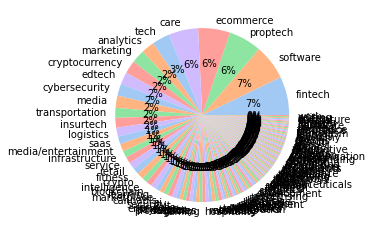

In [ ]:
colors = sns.color_palette('pastel')[0:5]

labels = labels = industry_counter.index

#create pie chart
plt.pie(industry_counter, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()